### 4.10 - Coding Etiquette & Excel Reporting - part 1 - Kaggle

#### Part 1

Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Create an appropriate visualization to show the distribution of profiles.
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

Compare your customer profiles with regions and departments. Can you identify a link between them? 

Customers may demonstrate different behaviors across regions, which could make this information important.
Produce suitable charts to illustrate your results and export them in your project folder.

Tidy up your script, export your final data set, and save your notebook.

#### Importing libraries and files

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import polars as pl

In [5]:
path = "/kaggle/input/instacart/"

In [6]:
# uploading subset of ords_prods_custs of 1M rows:
subset = pd.read_parquet(os.path.join(path, 'instacart_subset_1M.parquet'))
# I'll work with this subset so my computer and used software do not crash. 

This is how I created the subset, previously:
````python
# lets create a random subset of a million rows using polars, which saves RAM:
subset = ords_prods_custs.sample(n=1_000_000, seed=42)

### Question:
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [7]:
subset.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,221517,32854,3,1,11,17.0,23909,5,1,2% Reduced Fat Milk,...,Regular customer,Gerald,Joseph,Male,Florida,80,10/15/2018,1,married,116151
1,34953,62732,7,2,12,18.0,10246,17,1,Organic Celery Hearts,...,Frequent customer,Teresa,Maynard,Female,Alaska,55,1/9/2018,3,married,142370
2,1167715,60809,10,0,15,6.0,12341,4,1,Hass Avocados,...,Regular customer,None,Avery,Male,Kansas,29,4/28/2017,1,married,84718
3,3288224,150105,61,2,18,6.0,10749,7,1,Organic Red Bell Pepper,...,Frequent customer,Virginia,Mccormick,Female,Hawaii,56,10/21/2019,3,married,160723
4,365104,110644,32,3,13,4.0,35018,6,0,Coldcalm Homeopathic Tablets,...,Frequent customer,Gregory,Richard,Male,New Jersey,39,10/25/2018,0,single,72025


### Answer:
The dataset shows PII (personal identifiable information), such as their state of residence, age, civil status and number of dependants, but in particular first and last names. 

I would remove those two columns before proceeding but would ask my supervisor first.

#### Question:
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [8]:
# dictionary mapping states to regions
state_to_region = {
    # Northeast
    "Maine": "Northeast", "New Hampshire": "Northeast", "Vermont": "Northeast",
    "Massachusetts": "Northeast", "Rhode Island": "Northeast", "Connecticut": "Northeast",
    "New York": "Northeast", "Pennsylvania": "Northeast", "New Jersey": "Northeast",

    # Midwest
    "Wisconsin": "Midwest", "Michigan": "Midwest", "Illinois": "Midwest",
    "Indiana": "Midwest", "Ohio": "Midwest",
    "North Dakota": "Midwest", "South Dakota": "Midwest", "Nebraska": "Midwest",
    "Kansas": "Midwest", "Minnesota": "Midwest", "Iowa": "Midwest", "Missouri": "Midwest",

    # South
    "Delaware": "South", "Maryland": "South", "District of Columbia": "South",
    "Virginia": "South", "West Virginia": "South", "North Carolina": "South",
    "South Carolina": "South", "Georgia": "South", "Florida": "South",
    "Kentucky": "South", "Tennessee": "South", "Mississippi": "South", "Alabama": "South",
    "Oklahoma": "South", "Texas": "South", "Arkansas": "South", "Louisiana": "South",

    # West
    "Idaho": "West", "Montana": "West", "Wyoming": "West",
    "Nevada": "West", "Utah": "West", "Colorado": "West",
    "Arizona": "West", "New Mexico": "West",
    "Alaska": "West", "Washington": "West", "Oregon": "West",
    "California": "West", "Hawaii": "West"
}

In [9]:
# this creates a new column in the data set, called 'region', in which the lists created above will be incorporated:
subset["region"] = subset["state"].map(state_to_region)

In [10]:
# this allows to see all columns of the dataset using function .head()
pd.set_option('display.max_columns', None)
subset.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,orders_affluence,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_ord_freq,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,221517,32854,3,1,11,17.0,23909,5,1,2% Reduced Fat Milk,84,16,9.2,Mid-range product,Regularly busy,Busiest days,Most orders,5,New customer,7.912766,Low Spender,17.0,Regular customer,Gerald,Joseph,Male,Florida,80,10/15/2018,1,married,116151,South
1,34953,62732,7,2,12,18.0,10246,17,1,Organic Celery Hearts,83,4,4.5,Low-range product,Regularly busy,Regularly busy,Most orders,30,Regular customer,7.037897,Low Spender,7.0,Frequent customer,Teresa,Maynard,Female,Alaska,55,1/9/2018,3,married,142370,West
2,1167715,60809,10,0,15,6.0,12341,4,1,Hass Avocados,32,4,9.1,Mid-range product,Busiest day,Busiest days,Most orders,11,Regular customer,7.420270,Low Spender,15.0,Regular customer,None,Avery,Male,Kansas,29,4/28/2017,1,married,84718,Midwest
3,3288224,150105,61,2,18,6.0,10749,7,1,Organic Red Bell Pepper,83,4,5.7,Mid-range product,Regularly busy,Regularly busy,Average orders,63,Loyal customer,8.451866,Low Spender,6.0,Frequent customer,Virginia,Mccormick,Female,Hawaii,56,10/21/2019,3,married,160723,West
4,365104,110644,32,3,13,4.0,35018,6,0,Coldcalm Homeopathic Tablets,11,11,13.5,Mid-range product,Regularly busy,Least busy days,Most orders,53,Loyal customer,7.475906,Low Spender,7.0,Frequent customer,Gregory,Richard,Male,New Jersey,39,10/25/2018,0,single,72025,Northeast


#### Question:
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [11]:
crosstab = pd.crosstab(subset['region'], subset['spending_flag'], dropna = False)

In [12]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,4813,229900
Northeast,3417,172693
South,6441,327107
West,4935,250694


#### Question:
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [13]:
# this creates a new column with an expulsion flag; every row with =< 5 orders will fall on that category of low activity:
subset['low_activity_flag'] = subset['max_order'] <= 5

In [14]:
# now, creating a filter called 'active_customers', by applying the upper condition:
active_customers = subset.loc[subset['max_order'] > 5]

In [15]:
active_customers

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,orders_affluence,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_ord_freq,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,low_activity_flag
1,34953,62732,7,2,12,18.0,10246,17,1,Organic Celery Hearts,83,4,4.5,Low-range product,Regularly busy,Regularly busy,Most orders,30,Regular customer,7.037897,Low Spender,7.0,Frequent customer,Teresa,Maynard,Female,Alaska,55,1/9/2018,3,married,142370,West,False
2,1167715,60809,10,0,15,6.0,12341,4,1,Hass Avocados,32,4,9.1,Mid-range product,Busiest day,Busiest days,Most orders,11,Regular customer,7.420270,Low Spender,15.0,Regular customer,None,Avery,Male,Kansas,29,4/28/2017,1,married,84718,Midwest,False
3,3288224,150105,61,2,18,6.0,10749,7,1,Organic Red Bell Pepper,83,4,5.7,Mid-range product,Regularly busy,Regularly busy,Average orders,63,Loyal customer,8.451866,Low Spender,6.0,Frequent customer,Virginia,Mccormick,Female,Hawaii,56,10/21/2019,3,married,160723,West,False
4,365104,110644,32,3,13,4.0,35018,6,0,Coldcalm Homeopathic Tablets,11,11,13.5,Mid-range product,Regularly busy,Least busy days,Most orders,53,Loyal customer,7.475906,Low Spender,7.0,Frequent customer,Gregory,Richard,Male,New Jersey,39,10/25/2018,0,single,72025,Northeast,False
5,1365621,31182,48,0,17,3.0,14675,1,0,White Miso Soup,66,6,4.5,Low-range product,Busiest day,Busiest days,Average orders,68,Loyal customer,7.964071,Low Spender,5.0,Frequent customer,Clarence,Carter,Male,Montana,58,1/16/2020,0,single,91299,West,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,3352463,172467,47,3,9,19.0,27966,3,1,Organic Raspberries,123,4,4.4,Low-range product,Regularly busy,Least busy days,Most orders,72,Loyal customer,7.791829,Low Spender,4.0,Frequent customer,Alan,Lam,Male,Minnesota,61,2/20/2019,3,married,134108,Midwest,False
999995,3345671,41553,46,2,21,2.0,3952,9,1,Organic Broccoli Crowns,83,4,11.8,Mid-range product,Regularly busy,Regularly busy,Average orders,49,Loyal customer,7.559524,Low Spender,6.0,Frequent customer,Michael,Gallagher,Male,Pennsylvania,34,12/28/2019,0,single,57494,Northeast,False
999996,1640936,51609,3,5,16,30.0,1940,16,0,Organic 2% Reduced Fat Milk,84,16,9.1,Mid-range product,Regularly busy,Regularly busy,Most orders,21,Regular customer,8.198870,Low Spender,10.0,Frequent customer,Earl,Pace,Male,Washington,30,6/22/2018,1,married,70842,West,False
999998,2162203,169060,34,2,14,7.0,34969,6,1,Red Vine Tomato,83,4,4.5,Low-range product,Regularly busy,Regularly busy,Most orders,47,Loyal customer,8.105263,Low Spender,5.0,Frequent customer,Marilyn,Sandoval,Female,Vermont,75,12/5/2017,0,divorced/widowed,92142,Northeast,False


In [16]:
# checking some values before exporting:
subset['low_activity_flag'].value_counts()

low_activity_flag
False    931270
True      68730
Name: count, dtype: int64

In [17]:
# exporting the file as parquet:
active_customers.to_parquet('active_customers.parquet', index=False)


#### Question
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [18]:
active_customers.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'orders_affluence', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'user_avg_price', 'spending_flag', 'user_ord_freq',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'low_activity_flag'],
      dtype='object')

#### Columns to have into account:
x age

x income

x department_id (product type)

x n_dependants

optionally:

x orders_day_of_week

x order_hour_of_day


#### to create a profiling variable, say, *'customer_profile'*, that categorizes customers into meaningful behavioral or demographic segments - 

#### things like:

x Young Parent

x Affluent professional

x Senior saver

x etc.

#### Conceptual Thinking:

##### age
Younger = students, young professionals; 
Older = parents or retirees.
##### income
Lower = budget-conscious; 
Higher = premium spenders.
##### n_dependants
0 = single;
=>1 = family/parent.
##### department_id
baby products, alcohol, snacks, etc, can reveal lifestyle cues
##### orders_day_of_week/hour
Latenight/weekend = younger crowd;
Weekday mornings = families/planners.


#### Defining Categories: Profiles and Criteria
##### Young single:
age < 30, n_dependants = 0
##### Young parent:
age < 35, n_dependants => 1
##### Middle aged professional:
30 < age < 50, 200 000 < income < 300 000, n_dependants <= 1
##### Affluent middle aged professional:
30 < age < 50, income  > 400 000, n_dependants <= 1
##### Family shopper:
30 < age < 50, n_dependants => 2
##### Senior saver:
age > 60, income < 200 000
##### Affluent retiree:
age > 60, income > 400 000
##### Budget shopper:
income < 200 000, any age, tends to buy from cheaper departments

### Coding with Pandas:

In [19]:
conditions = [
    (active_customers['age'] < 30) & (active_customers['n_dependants'] == 0),
    (active_customers['age'] < 35) & (active_customers['n_dependants'] >= 1),
    (active_customers['age'].between(30,49)) & (active_customers['income'] > 200000) & (active_customers['income'] < 300000) & (active_customers['n_dependants'] <= 1),
    (active_customers['age'].between(30, 49)) & (active_customers['income'] > 400000) & (active_customers['n_dependants'] <= 1),
    (active_customers['age'].between(30, 49)) & (active_customers['n_dependants'] >= 2),
    (active_customers['age'] >= 60) & (active_customers['income'] < 200000),
    (active_customers['age'] >= 60) & (active_customers['income'] >= 400000),
    (active_customers['income'] < 200000)
]

choices = [
    'Young single',
    'Young parent',
    'Middle-aged professional',
    'Affluent middle-aged professional',
    'Family shopper',
    'Senior saver',
    'Affluent retiree',
    'Budget shopper'
]

active_customers['customer_profile'] = np.select(conditions, choices, default='Other')

# Quick checks
print(active_customers['customer_profile'].value_counts(dropna=False))

customer_profile
Senior saver                         314635
Budget shopper                       271501
Young parent                         186236
Family shopper                       109288
Young single                          43709
Other                                  4223
Middle-aged professional                740
Affluent retiree                        723
Affluent middle-aged professional       215
Name: count, dtype: int64


/tmp/ipykernel_37/3350028104.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers['customer_profile'] = np.select(conditions, choices, default='Other')


In [20]:
# order behavior:
active_customers.loc[active_customers['order_hour_of_day'] >= 21, 'customer_profile'] = 'Late-night shopper'
active_customers.loc[active_customers['orders_day_of_week'].isin([0,6]), 'customer_profile'] = 'Weekend shopper'


### Question:
Create an appropriate visualization to show the distribution of profiles.

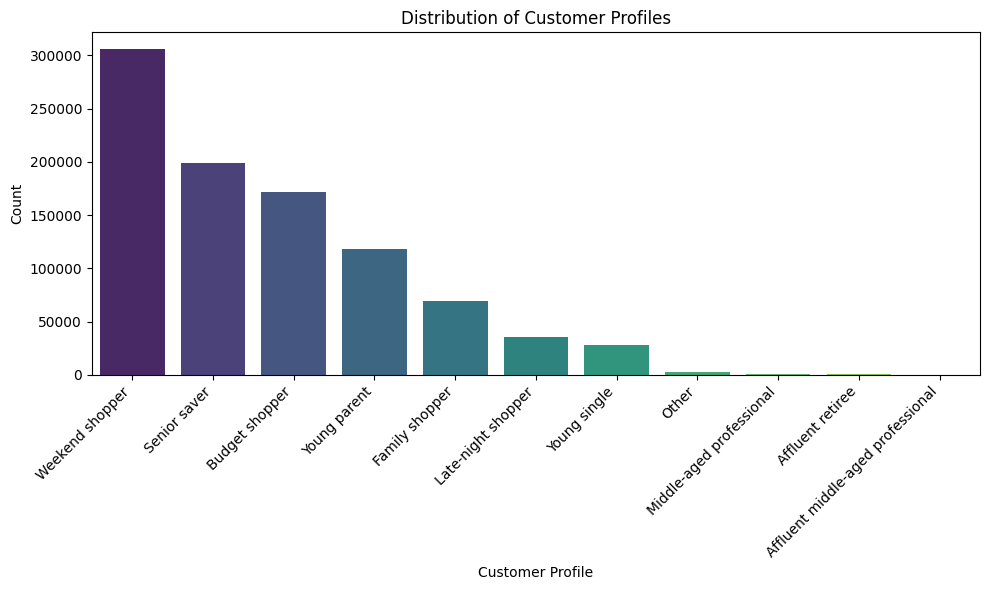

In [21]:
#Plotting the newly made customer profiles:

plt.figure(figsize=(10,6))
sns.countplot(data=active_customers, x='customer_profile', palette='viridis', order=active_customers['customer_profile'].value_counts().index)

plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# this saves it:
plt.savefig("/kaggle/working/customer_profiles_distribution.png", dpi=300, bbox_inches='tight')
#this shows it:
plt.show()

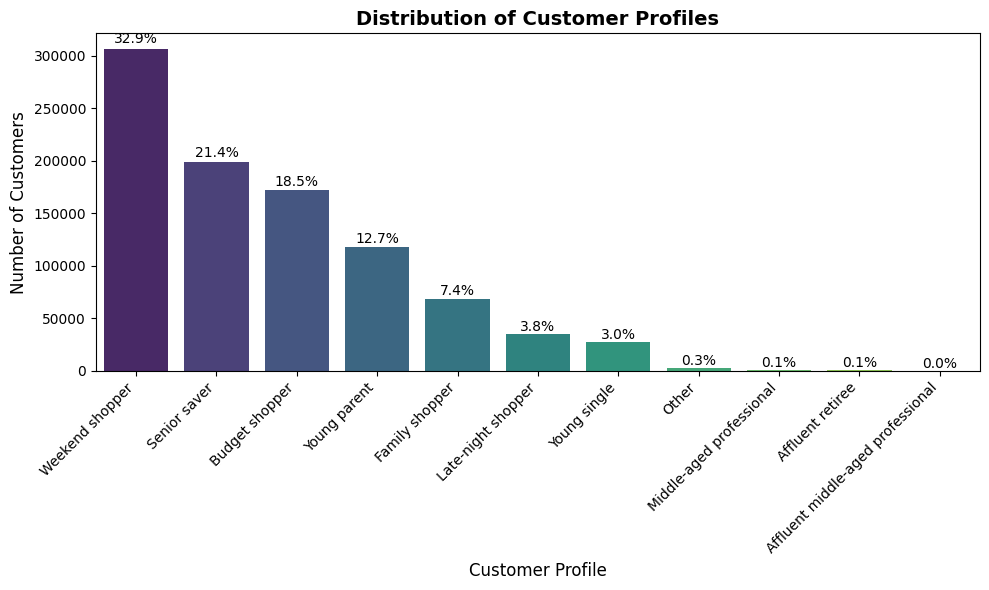

In [22]:
# lets do it another way (with chatGPT):

# Calculate profile counts and percentages
profile_counts = active_customers['customer_profile'].value_counts(normalize=False)
profile_perc = active_customers['customer_profile'].value_counts(normalize=True) * 100

# Combine into a DataFrame for easy plotting
profile_df = (
    profile_counts.rename('count')
    .to_frame()
    .assign(percentage=profile_perc)
    .reset_index()
    .rename(columns={'index': 'customer_profile'})
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=profile_df,
    x='customer_profile',
    y='count',
    palette='viridis',
    order=profile_df.sort_values('count', ascending=False)['customer_profile']
)

# Add percentage labels above bars
for i, row in profile_df.iterrows():
    plt.text(
        i, row['count'] + (row['count'] * 0.01),  # position slightly above the bar
        f"{row['percentage']:.1f}%",
        ha='center', va='bottom', fontsize=10
    )

plt.title('Distribution of Customer Profiles', fontsize=14, fontweight='bold')
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Question:
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [23]:
# Aggregating usage frequency and expenditure by customer profile
profile_agg = active_customers.groupby('customer_profile').agg({
    'user_ord_freq': ['mean', 'min', 'max'],
    'user_avg_price': ['mean', 'min', 'max']
}).reset_index()

# Display results
print(profile_agg)


                     customer_profile user_ord_freq            user_avg_price  \
                                               mean  min   max           mean   
0   Affluent middle-aged professional      7.515723  3.0  26.0     171.191666   
1                    Affluent retiree      9.312753  1.0  30.0     185.883169   
2                      Budget shopper      9.553046  0.0  30.0       9.925078   
3                      Family shopper      9.548274  0.0  30.0      13.001852   
4                  Late-night shopper      9.688436  0.0  30.0      11.408074   
5            Middle-aged professional      7.236162  2.0  30.0     215.530718   
6                               Other      8.924505  1.0  30.0     270.265463   
7                        Senior saver      9.539808  0.0  30.0       9.120762   
8                     Weekend shopper     10.049897  0.0  30.0      11.378823   
9                        Young parent      9.485747  0.0  30.0      11.826121   
10                       You

### Question:
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [24]:
# Crosstab of customer_profile vs region
profile_region = pd.crosstab(active_customers['customer_profile'], active_customers['region'], normalize='index')

# Display as percentages
print(profile_region.round(2))


region                             Midwest  Northeast  South  West
customer_profile                                                  
Affluent middle-aged professional     0.52       0.21   0.18  0.09
Affluent retiree                      0.32       0.17   0.30  0.20
Budget shopper                        0.24       0.17   0.33  0.26
Family shopper                        0.23       0.18   0.34  0.26
Late-night shopper                    0.24       0.18   0.33  0.25
Middle-aged professional              0.15       0.18   0.32  0.35
Other                                 0.23       0.19   0.33  0.24
Senior saver                          0.23       0.18   0.33  0.25
Weekend shopper                       0.23       0.18   0.33  0.26
Young parent                          0.23       0.18   0.34  0.25
Young single                          0.22       0.18   0.35  0.25


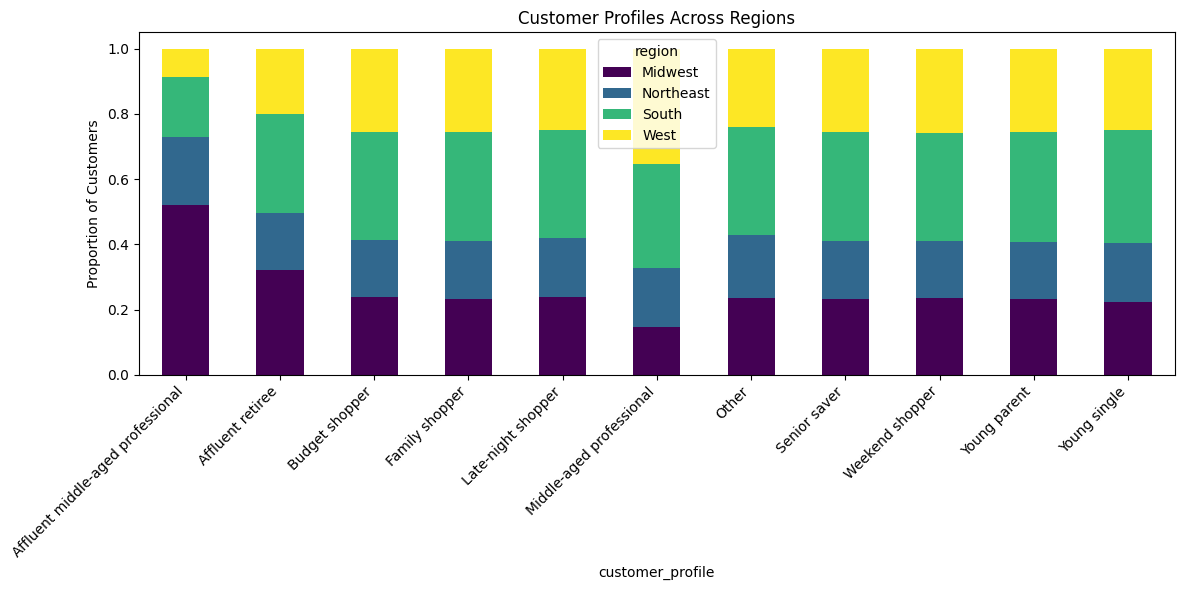

In [25]:
# optional viz:
profile_region.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.ylabel('Proportion of Customers')
plt.title('Customer Profiles Across Regions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# this saves it:
plt.savefig("/kaggle/working/customer_profiles_across_regions.png", dpi=300, bbox_inches='tight')
# this shows it:
plt.show()

In [26]:
profile_department = pd.crosstab(active_customers['customer_profile'], active_customers['department_id'], normalize='index')
print(profile_department.round(2))


department_id                        1     2     3     4     5     6     7   \
customer_profile                                                              
Affluent middle-aged professional  0.04  0.00  0.02  0.29  0.03  0.00  0.09   
Affluent retiree                   0.10  0.01  0.04  0.15  0.04  0.01  0.10   
Budget shopper                     0.07  0.00  0.04  0.28  0.01  0.01  0.09   
Family shopper                     0.07  0.00  0.04  0.28  0.00  0.01  0.09   
Late-night shopper                 0.07  0.00  0.03  0.31  0.00  0.01  0.07   
Middle-aged professional           0.06  0.00  0.04  0.16  0.01  0.01  0.11   
Other                              0.08  0.00  0.05  0.20  0.03  0.01  0.10   
Senior saver                       0.07  0.00  0.04  0.29  0.00  0.01  0.09   
Weekend shopper                    0.07  0.00  0.04  0.31  0.00  0.01  0.07   
Young parent                       0.07  0.00  0.04  0.28  0.01  0.01  0.09   
Young single                       0.06  0.00  0.03 

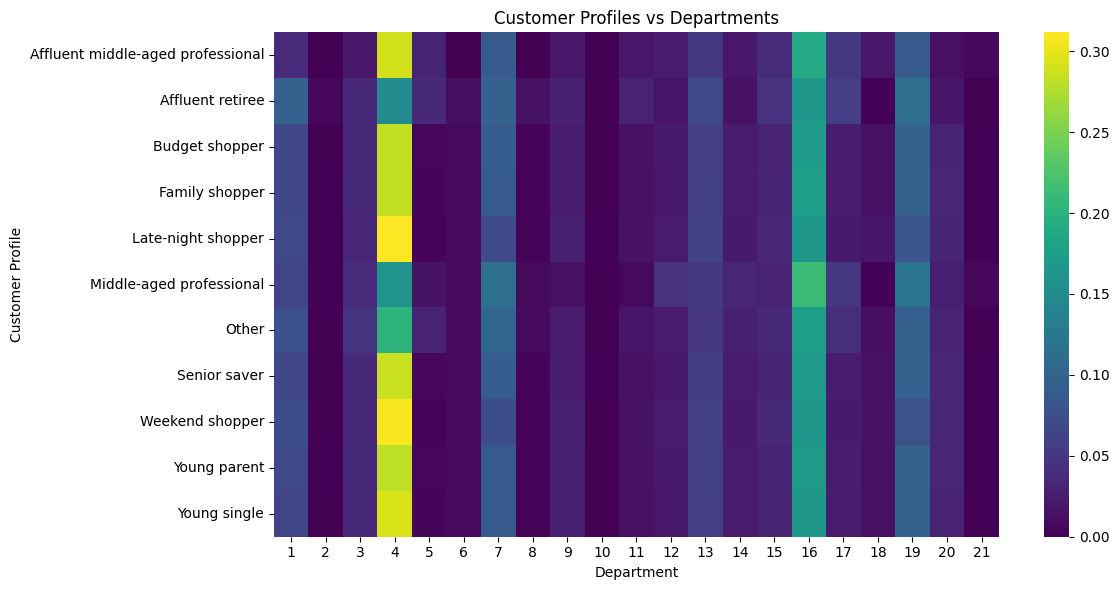

In [27]:
# optional viz:
plt.figure(figsize=(12,6))
sns.heatmap(profile_department, cmap='viridis', annot=False)
plt.title('Customer Profiles vs Departments')
plt.xlabel('Department')
plt.ylabel('Customer Profile')
plt.tight_layout()
#this saves it:
plt.savefig("/kaggle/working/customer_profiles_vs_departments.png", dpi=300, bbox_inches='tight')
# this shows it:
plt.show()


##### my department_id is in numbers. How can I use the name of the department instead of its id?

it's somewhere lost in module 4. Worry not. We'll find it.

#### I remembered, by looking at 4.4, that there's a dataset with the ID of the depts and their respective names. Let's upload it, make a crosstabs and plot the heatmap again:

In [29]:
#uploading the needed file:
depts_names = pd.read_csv(os.path.join(path, 'departments_wrangled.csv'))

In [31]:
depts_names

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [34]:
#1. creating the mapping dictionary from the department data frame:
dept_map = depts_names['department'].to_dict()

In [35]:
dept_map

{0: 'frozen',
 1: 'other',
 2: 'bakery',
 3: 'produce',
 4: 'alcohol',
 5: 'international',
 6: 'beverages',
 7: 'pets',
 8: 'dry goods pasta',
 9: 'bulk',
 10: 'personal care',
 11: 'meat seafood',
 12: 'pantry',
 13: 'breakfast',
 14: 'canned goods',
 15: 'dairy eggs',
 16: 'household',
 17: 'babies',
 18: 'snacks',
 19: 'deli',
 20: 'missing'}

The .to_dict() function transforms the data set into a lookup table in dictionary form, essential step to connect the names of the departments to the dept_ids displayed in the columns.

In [36]:
#2. renaming the columns in the existing crosstab:
profile_department_named = profile_department.rename(columns=dept_map)

In [37]:
profile_department_named

department_id,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
Affluent middle-aged professional,0.037736,0.000000,0.018868,0.289308,0.031447,0.000000,0.088050,0.000000,0.018868,0.000000,0.018868,0.025157,0.050314,0.018868,0.037736,0.188679,0.050314,0.018868,0.088050,0.012579,0.006289
Affluent retiree,0.095142,0.006073,0.036437,0.147773,0.036437,0.012146,0.095142,0.014170,0.028340,0.000000,0.030364,0.016194,0.068826,0.014170,0.044534,0.165992,0.056680,0.002024,0.111336,0.018219,0.000000
Budget shopper,0.066523,0.001110,0.036459,0.283615,0.005413,0.008035,0.089372,0.002692,0.025192,0.001203,0.014110,0.021023,0.056267,0.022296,0.030046,0.170389,0.023075,0.013076,0.096779,0.031436,0.001890
Family shopper,0.066290,0.001218,0.035741,0.283304,0.004381,0.007630,0.087511,0.002843,0.025355,0.000986,0.013664,0.020641,0.057340,0.021918,0.030722,0.171831,0.023397,0.014259,0.096113,0.032579,0.002277
Late-night shopper,0.068109,0.001251,0.033059,0.311663,0.002814,0.008698,0.070155,0.003042,0.027516,0.001478,0.014412,0.021916,0.060945,0.021490,0.033287,0.165155,0.020893,0.017823,0.082862,0.031212,0.002217
Middle-aged professional,0.062731,0.001845,0.036900,0.160517,0.014760,0.007380,0.112546,0.007380,0.012915,0.000000,0.007380,0.044280,0.053506,0.033210,0.029520,0.212177,0.049815,0.001845,0.119926,0.025830,0.005535
Other,0.075668,0.000694,0.045817,0.201666,0.029851,0.008678,0.102048,0.009025,0.022215,0.000347,0.016661,0.022909,0.049636,0.028462,0.034710,0.174245,0.040958,0.011107,0.094759,0.029851,0.000694
Senior saver,0.066843,0.001100,0.036400,0.285109,0.004917,0.007891,0.089853,0.003019,0.024798,0.001256,0.013883,0.020262,0.055341,0.021950,0.030534,0.169640,0.023326,0.013637,0.095669,0.032523,0.002049
Weekend shopper,0.072158,0.000963,0.035896,0.308744,0.003282,0.009001,0.071890,0.002972,0.028528,0.001120,0.013426,0.023832,0.057559,0.020092,0.036239,0.165362,0.021506,0.013439,0.078347,0.033554,0.002087


Yeah! Now we're talking. 

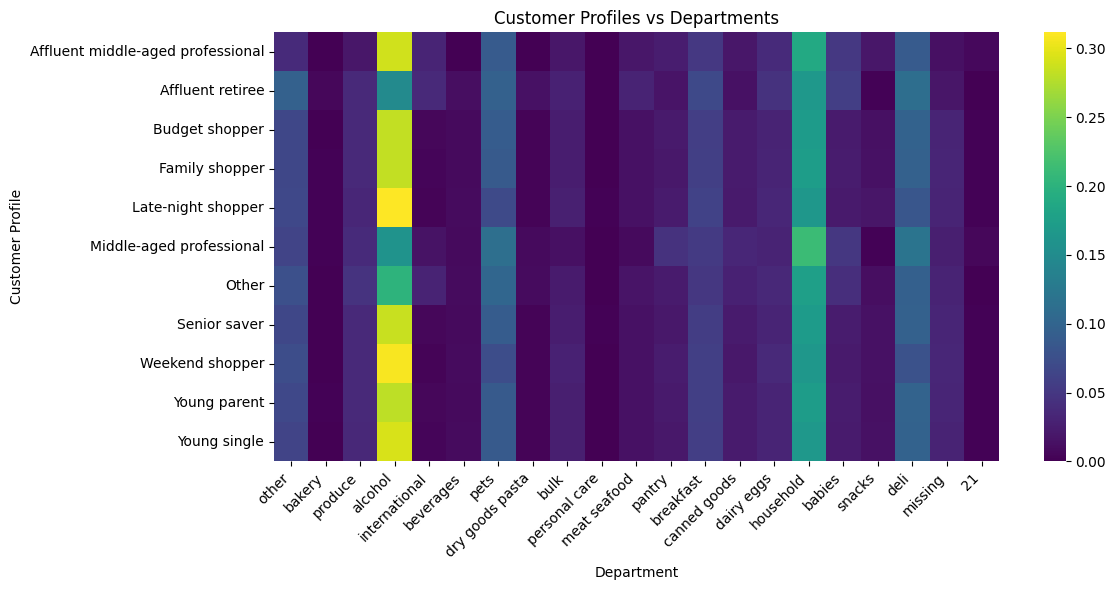

In [40]:
#3. plotting it:
plt.figure(figsize=(12,6))
sns.heatmap(profile_department_named, cmap='viridis', annot=False)
plt.title('Customer Profiles vs Departments')
plt.xlabel('Department')
plt.ylabel('Customer Profile')
plt.xticks(rotation=45, ha='right')  # it rotates the labels for readability
plt.tight_layout()
#4. saving it and showing it:
plt.savefig("/kaggle/working/customer_profiles_vs_departments_named.png", dpi=300, bbox_inches='tight')
plt.show()

### Good! But now we have a mysterious department 21. Gosh, neverending story.
What could it be?